<a href="https://colab.research.google.com/github/a-n-u-r-a-g/Hybrid-Ensemble-Learning/blob/main/UNSW_NB15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Reshape
from tensorflow.keras.layers import Bidirectional
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install shap
!pip install lime
import shap
import lime.lime_tabular



In [ ]:
df_train = pd.read_csv('/content/UNSW_NB15_training-set.csv')
df_test = pd.read_csv('/content/UNSW_NB15_testing-set.csv')

# Data Preprocessing
# Remove useless features
useless_features = ['id', 'attack_cat']
df_train.drop(useless_features, axis=1, inplace=True)
df_test.drop(useless_features, axis=1, inplace=True)


# Encode categorical features
categorical_cols = df_train.select_dtypes(include=['object']).columns # Identify all object (string) columns
df_train = pd.get_dummies(df_train, columns=categorical_cols)
df_test = pd.get_dummies(df_test, columns=categorical_cols)


# Align columns of test set with train set
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

# Encode labels
df_train['label'] = df_train['label'].map(lambda x: 1 if x != 0 else 0)
df_test['label'] = df_test['label'].map(lambda x: 1 if x != 0 else 0)

# Feature Scaling
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the dataset
X_train_part, _, y_train_part, _ = train_test_split(X_train_scaled, y_train, test_size=0.8, random_state=42)

# Now proceed with your model training using X_train_part and y_train_part


In [ ]:
# Define CNN Model
cnn_model = Sequential([
    Reshape((X_train_part.shape[1], 1), input_shape=(X_train_part.shape[1],)),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN Model
cnn_model.fit(X_train_part, y_train_part, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9201 - loss: 0.1942 - val_accuracy: 0.9407 - val_loss: 0.1261
Epoch 2/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9381 - loss: 0.1268 - val_accuracy: 0.9373 - val_loss: 0.1220
Epoch 3/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9424 - loss: 0.1213 - val_accuracy: 0.9403 - val_loss: 0.1203
Epoch 4/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9434 - loss: 0.1172 - val_accuracy: 0.9391 - val_loss: 0.1228
Epoch 5/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9415 - loss: 0.1178 - val_accuracy: 0.9390 - val_loss: 0.1193
Epoch 6/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9454 - loss: 0.1152 - val_accuracy: 0.9366 - val_loss: 0.1243
Epoch 7/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9416 - loss: 0.1170 - val_accuracy: 0.9411 - val_loss: 0.1200
Epoch 8/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9461 - loss: 0.1118 - val_a

In [ ]:
# Define BiLSTM Model
bilstm_model = Sequential([
    Reshape((X_train_part.shape[1], 1), input_shape=(X_train_part.shape[1],)),
    Bidirectional(LSTM(50)),  # Use Bidirectional LSTM
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the BiLSTM Model
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train BiLSTM Model
bilstm_model.fit(X_train_part, y_train_part, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 130s 144ms/step - accuracy: 0.8524 - loss: 0.3268 - val_accuracy: 0.9281 - val_loss: 0.1987
Epoch 2/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 141s 143ms/step - accuracy: 0.9335 - loss: 0.1833 - val_accuracy: 0.9289 - val_loss: 0.1683
Epoch 3/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 144s 146ms/step - accuracy: 0.9307 - loss: 0.1722 - val_accuracy: 0.9311 - val_loss: 0.1723
Epoch 4/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 138s 141ms/step - accuracy: 0.9353 - loss: 0.1532 - val_accuracy: 0.9331 - val_loss: 0.1492
Epoch 5/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 141s 140ms/step - accuracy: 0.9368 - loss: 0.1437 - val_accuracy: 0.9309 - val_loss: 0.1566
Epoch 6/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 124s 141ms/step - accuracy: 0.9354 - loss: 0.1430 - val_accuracy: 0.9299 - val_loss: 0.1508
Epoch 7/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 124s 141ms/step - accuracy: 0.9334 - loss: 0.1545 - val_accuracy: 0.9338 - val_loss: 0.1432
Epoch 8/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 124s 141ms/step - accuracy: 0.9360 -

In [ ]:
# Define Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_part, y_train_part)


RandomForestClassifier(random_state=42)

In [ ]:
# Function to extract features from the second last layer of a CNN or LSTM model
def extract_features(model, X):
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
    return intermediate_layer_model.predict(X)

# Example usage of feature extraction (assuming models and data are defined)
cnn_features_train = extract_features(cnn_model, X_train_scaled)
cnn_features_test = extract_features(cnn_model, X_test_scaled)
bilstm_features_train = extract_features(bilstm_model, X_train_scaled)
bilstm_features_test = extract_features(bilstm_model, X_test_scaled)

# Combine extracted features with original data
X_train_ensemble = np.hstack((X_train_scaled, cnn_features_train, bilstm_features_train))
X_test_ensemble = np.hstack((X_test_scaled, cnn_features_test, bilstm_features_test))

# Train an advanced ensemble classifier using soft voting
ensemble_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('cnn', LogisticRegression(max_iter=1000)),
    ('bilstm', LogisticRegression(max_iter=1000))
], voting='soft')

# Fit the ensemble model on the training data
ensemble_clf.fit(X_train_ensemble, y_train)

# Evaluate the model on the test data
accuracy = ensemble_clf.score(X_test_ensemble, y_test)
print(f'Ensemble Model Accuracy: {accuracy}')

ValueError: The layer sequential has never been called and thus has no defined input.

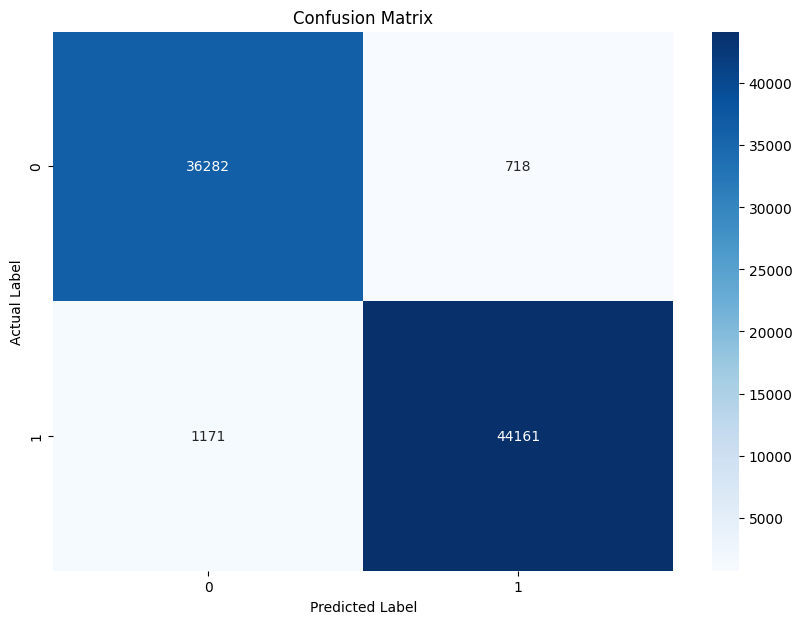

Accuracy: 0.9770563086041879
Precision: 0.9840014260567304
Recall: 0.9741683578928793
F1 Score: 0.9790602033011496


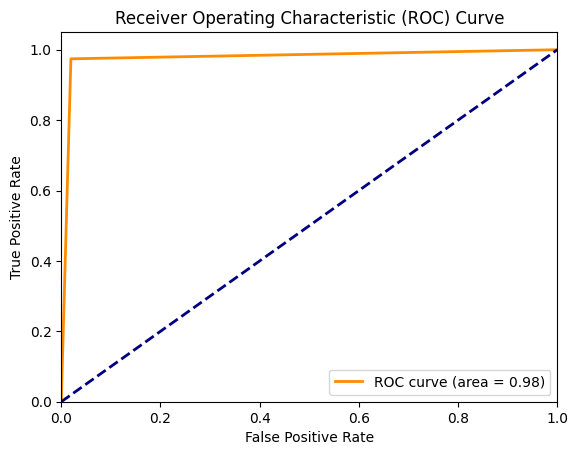

In [ ]:
# Predict on test data
y_pred = voting_clf.predict(X_test_ensemble)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

# False Positive Rate (FPR)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Compute FPR
fpr = fp / (fp + tn)

# Print TP, TN, FP, FN, and FPR
print(f'True Positives (TP): {tp}')
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')
print(f'False Positive Rate (FPR): {fpr}')


True Positives (TP): 44161
True Negatives (TN): 36282
False Positives (FP): 718
False Negatives (FN): 1171
False Positive Rate (FPR): 0.019405405405405404


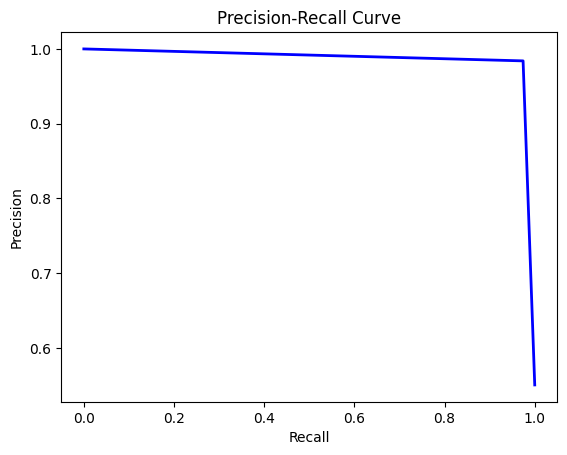

In [ ]:
# Predict on test data using the voting classifier
ensemble_pred = voting_clf.predict(X_test_ensemble)

# Precision-Recall Graph
precision, recall, _ = precision_recall_curve(y_test, ensemble_pred)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# SHAP explanations for Random Forest model
explainer_shap = shap.TreeExplainer(rf_model)
shap_values = explainer_shap.shap_values(X_test_scaled)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

# LIME explanations for Random Forest model
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X_train.columns, class_names=['normal', 'anomaly'], discretize_continuous=True)
explanation = explainer_lime.explain_instance(X_test_scaled[0], rf_model.predict_proba, num_features=10)
explanation.show_in_notebook(show_table=True)


NameError: name 'shap' is not defined

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# Initialize models
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Train models (use X_train_scaled, y_train)
nb_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

In [ ]:

# Predict Probabilities
nb_probs = nb_model.predict_proba(X_test_scaled)[:, 1]
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
ensemble_probs = voting_clf.predict_proba(X_test_ensemble)[:, 1]  # Ensemble probabilities


In [ ]:

# Calculate ROC-AUC and Plot
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_probs)  # Ensemble ROC


In [ ]:

# Calculate ROC-AUC and Plot
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_probs)  # Ensemble ROC

nb_auc = auc(nb_fpr, nb_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
lr_auc = auc(lr_fpr, lr_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
ensemble_auc = auc(ensemble_fpr, ensemble_tpr)  # Ensemble AUC

plt.figure(figsize=(10, 8))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.2f)' % dt_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % knn_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_auc)
plt.plot(ensemble_fpr, ensemble_tpr, label='Ensemble (AUC = %0.2f)' % ensemble_auc)  # Ensemble ROC

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()